In [1]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

terran_data = read_csv('../Output/TerranMarch.csv', header=0, index_col=False)
display(terran_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win
0,0,World of Sleepers LE,us,437,T,P,0.0,1,0,Player 1 - INnoVation (Terran),12,12,15,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,1
1,0,World of Sleepers LE,us,437,T,P,117.6,480,30,Player 1 - INnoVation (Terran),13,14,15,50,727,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,1,0,0,0,0,0,1
2,0,World of Sleepers LE,us,437,T,P,197.4,960,60,Player 1 - INnoVation (Terran),15,16,23,65,727,200,1250,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,1,0,0,0,0,0,1
3,0,World of Sleepers LE,us,437,T,P,200.2,1440,90,Player 1 - INnoVation (Terran),17,18,23,135,867,275,1350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,0,0,0,0,0,1,0,0,0,0,0,1
4,0,World of Sleepers LE,us,437,T,P,149.8,1920,120,Player 1 - INnoVation (Terran),18,19,23,405,755,200,1475,0,0,48,179,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69856,1983,Eternal Empire LE,eu,1610,T,Z,159.6,33600,2100,Player 2 - LiquidClem (Terran),62,167,233,445,1483,1350,17225,3975,35744,96,716,700,3200,1700,10884,1,0,0,11,6,5,0,0,1,0,2,2,0,2,1,4,1,0,0,13,13,6,3,1,0,3,1,0,1,0,9,62,1,0,2,2,0,15,0,0,0,0,11,0
69857,1983,Eternal Empire LE,eu,1610,T,Z,229.6,34080,2130,Player 2 - LiquidClem (Terran),45,148,233,70,699,650,16825,4575,37594,48,380,300,3575,2075,11209,1,0,0,11,6,5,0,0,1,0,2,2,0,2,1,7,1,0,0,13,16,6,3,1,0,3,1,0,1,0,7,45,1,0,2,2,0,15,0,0,0,0,11,0
69858,1983,Eternal Empire LE,eu,1610,T,Z,169.4,34560,2160,Player 2 - LiquidClem (Terran),41,138,233,170,1091,300,16600,4550,38469,64,313,150,3675,2175,11409,1,0,0,11,6,5,0,0,1,0,2,2,0,2,1,7,1,0,0,12,14,7,3,2,0,3,1,0,1,0,7,41,1,0,2,2,0,15,0,0,0,0,12,0
69859,1983,Eternal Empire LE,eu,1610,T,Z,159.6,35040,2190,Player 2 - LiquidClem (Terran),37,113,218,605,1651,325,14500,3300,40900,59,335,250,2850,1350,12284,1,0,0,11,6,5,0,0,1,0,2,2,0,2,1,1,1,0,0,11,12,7,2,1,0,2,1,0,1,0,7,37,1,0,2,2,0,15,0,0,0,0,10,0


In [2]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(terran_data) if x not in no_normalize]

#Normalizing these columns
norm = terran_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
terran_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=terran_data.index)

#One-hot Encoding the categorical variables
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['map_name'], prefix='Map'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['region'], prefix='Region'))
terran_data_normalized = terran_data_normalized.join(pd.get_dummies(terran_data['enemy_race'], prefix='Enemy'))

#Displaying first and last 5 rows
display(terran_data_normalized.head(5), terran_data_normalized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win,Map_Acropolis LE,Map_Année zéro EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_Вечная империя РВ,Map_Лед и хром РВ,Map_Подводный мир РВ,Map_Помечтай РВ,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
0,0.000000,0.115385,0.060,0.034965,0.004850,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.000000,0.115385,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0.278146,0.125000,0.070,0.034965,0.004850,0.129199,0.031915,0.001706,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.000000,0.125000,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0.466887,0.144231,0.080,0.053613,0.006305,0.129199,0.042553,0.008532,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.000000,0.144231,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0.473510,0.163462,0.090,0.053613,0.013095,0.154079,0.058511,0.011945,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.058824,0.163462,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,0.354305,0.173077,0.095,0.053613,0.039286,0.134175,0.042553,0.016212,0.0,0.0,0.005798,0.085934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,armory,autoturret,banshee,barracks,barrackstechlab,barracksreactor,battlecruiser,bunker,commandcenter,cyclone,engineeringbay,factory,factoryreactor,factorytechlab,fusioncore,ghost,ghostacademy,hellion,liberator,marauder,marine,medivac,missileturret,mule,nuke,orbitalcommand,planetaryfortress,raven,reactor,reaper,refinery,scv,sensortower,siegetank,starport,starportreactor,starporttechlab,supplydepot,techlab,thor,viking,warhound,widowmine,win,Map_Acropolis LE,Map_Année zéro EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Piliers d'or EC,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Sous-marin EC,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_Вечная империя РВ,Map_Лед и хром РВ,Map_Подводный мир РВ,Map_Помечтай РВ,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
69856,0.377483,0.596154,0.835,0.543124,0.043166,0.263551,0.287234,0.553754,0.425134,0.567680,0.011596,0.343735,0.264151,0.327366,0.244604,0.407793,0.25,0.0,0.0,0.6875,0.75,0.555556,0.0,0.0,0.0,0.0,0.5,0.153846,0.0,0.2,0.5,0.166667,0.2,0.0,0.0,0.342105,0.116071,0.315789,0.076923,0.052632,0.0,0.307692,0.142857,0.0,0.111111,0.0,0.529412,0.596154,0.166667,0.0,0.25,0.285714,0.0,0.555556,0.0,0.0,0.0,0.0,0.523810,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
69857,0.543046,0.432692,0.740,0.543124,0.006790,0.124222,0.138298,0.540102,0.489305,0.597062,0.005798,0.182429,0.113208,0.365729,0.298561,0.419970,0.25,0.0,0.0,0.6875,0.75,0.555556,0.0,0.0,0.0,0.0,0.5,0.153846,0.0,0.2,0.5,0.291667,0.2,0.0,0.0,0.342105,0.142857,0.315789,0.076923,0.052632,0.0,0.307692,0.142857,0.0,0.111111,0.0,0.411765,0.432692,0.166667,0.0,0.25,0.285714,0.0,0.555556,0.0,0.0,0.0,0.0,0.523810,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
69858,0.400662,0.394231,0.690,0.543124,0.016490,0.193887,0.063830,0.532423,0.486631,0.610958,0.007730,0.150264,0.056604,0.375959,0.312950,0.427463,0.25,0.0,0.0,0.6875,0.75,0.555556,0.0,0.0,0.0,0.0,0.5,0.153846,0.0,0.2,0.5,0.291667,0.2,0.0,0.0,0.315789,0.125000,0.368421,0.076923,0.105263,0.0,0.307692,0.142857,0.0,0.111111,0.0,0.411765,0.394231,0.166667,0.0,0.25,0.285714,0.0,0.555556,0.0,0.0,0.0,0.0,0.571429,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
69859,0.377483,0.355769,0.565,0.508159,0.058687,0.293407,0.069149,0.460751,0.352941,0.649567,0.007126,0.160826,0.094340,0.291560,0.194245,0.460247,0.25,0.0,0.0,0.6875,0.75,0.555556,0.0,0.0,0.0,0.0,0.5,0.153846,0.0,0.2,0.5,0.041667,0.2,0.0,0.0,0.289474,0.107143,0.368421,0.051282,0.052632,0.0,0.230769,0.142857,0.0,0.111111,0.0,0.411765,0.355769,0.166667,0.0

In [3]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(terran_data_normalized) if x not in no_X]

Y = terran_data_normalized['win']
X_normalized = terran_data_normalized[yes_X]

In [4]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]

X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

In [5]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [6]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [7]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(44711, 1)
(11177, 1)
(13973, 1)


In [8]:
print(X_normalized_train.shape)
print(X_normalized_val.shape)
print(X_normalized_test.shape)

(44711, 131)
(11177, 131)
(13973, 131)


In [9]:
win_length = 1
sampling_rate = 1
batch_size = 32
num_features = len(yes_X)

train_generator = TimeseriesGenerator(X_normalized_train, Y_train, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_normalized_val, Y_val, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_normalized_test, Y_test, length = win_length,
                                     sampling_rate=sampling_rate, batch_size = batch_size)

In [10]:
val_performance = {}
performance = {}

In [21]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=123, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.7063 - binary_accuracy: 0.5096 - precision_5: 0.4978 - recall_5: 0.4779 - val_loss: 0.6895 - val_binary_accuracy: 0.5388 - val_precision_5: 0.5461 - val_recall_5: 0.8623
Epoch 2/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6900 - binary_accuracy: 0.5478 - precision_5: 0.5381 - recall_5: 0.5225 - val_loss: 0.6892 - val_binary_accuracy: 0.5361 - val_precision_5: 0.5484 - val_recall_5: 0.7965
Epoch 3/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6809 - binary_accuracy: 0.5624 - precision_5: 0.5526 - recall_5: 0.5463 - val_loss: 0.6898 - val_binary_accuracy: 0.5353 - val_precision_5: 0.5503 - val_recall_5: 0.7611
Epoch 4/100
1398/1398 [==============================] - 12s 8ms/step - loss: 0.6752 - binary_accuracy: 0.5724 - precision_5: 0.5622 - recall_5: 0.5626 - val_loss: 0.6903 - val_binary_accuracy: 0.5379 - val_precision_5: 0.5538 - val_recall_5: 0.7419


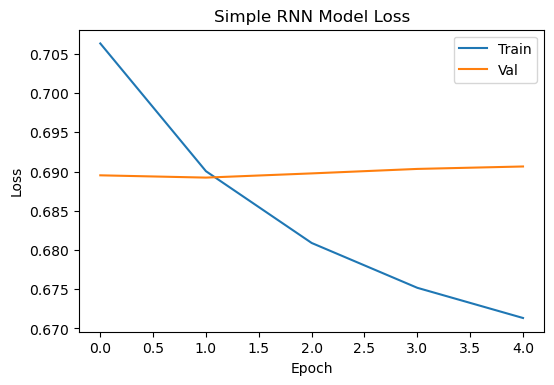

In [22]:
#Simple RNN Model Loss
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [20]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=125, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit_generator(train_generator,epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6989 - binary_accuracy: 0.5131 - precision_4: 0.5022 - recall_4: 0.3525 - auc: 0.5053 - val_loss: 0.6981 - val_binary_accuracy: 0.4602 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_auc: 0.5414
Epoch 2/100
1398/1398 [==============================] - 12s 8ms/step - loss: 0.6941 - binary_accuracy: 0.5194 - precision_4: 0.5115 - recall_4: 0.3561 - auc: 0.5160 - val_loss: 0.6949 - val_binary_accuracy: 0.4766 - val_precision_4: 0.6620 - val_recall_4: 0.0623 - val_auc: 0.5435- ETA: 1s - loss: 0.6938 - binary_acc
Epoch 3/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6910 - binary_accuracy: 0.5307 - precision_4: 0.5272 - recall_4: 0.3796 - auc: 0.5376 - val_loss: 0.6932 - val_binary_accuracy: 0.5032 - val_precision_4: 0.5865 - val_recall_4: 0.2702 - val_auc: 0.5413inary_accuracy: 0.5321 - precision

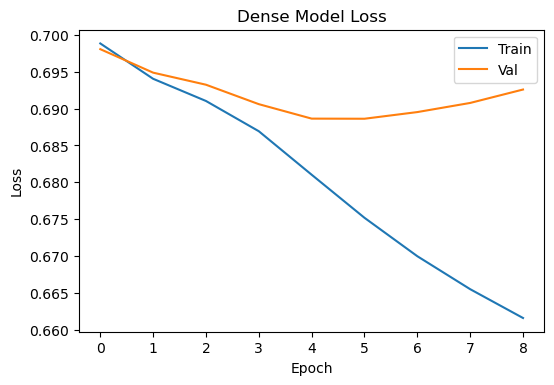

In [23]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [30]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(39, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dropout(0.8))
lstm_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1398/1398 [==============================] - 13s 9ms/step - loss: 0.6956 - binary_accuracy: 0.5097 - precision_10: 0.4976 - recall_10: 0.4048 - auc_5: 0.5056 - val_loss: 0.6926 - val_binary_accuracy: 0.5054 - val_precision_10: 0.5533 - val_recall_10: 0.4346 - val_auc_5: 0.5319ETA: 0s - loss: 0.6958 - binary_accuracy: 0.5107 - precision_10: 0.4990 - recall_10: 0.41
Epoch 2/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6896 - binary_accuracy: 0.5412 - precision_10: 0.5373 - recall_10: 0.4358 - auc_5: 0.5501 - val_loss: 0.6914 - val_binary_accuracy: 0.5131 - val_precision_10: 0.5583 - val_recall_10: 0.4691 - val_auc_5: 0.5419accuracy: 0.5 - ETA: 6s - loss: 0.6877 - binary_accuracy: 0.5 - ETA: 5s - - ETA: 2s - los
Epoch 3/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6825 - binary_accuracy: 0.5637 - precision_10: 0.5599 - recall_10: 0.4987 - auc_5: 0.5843 - val_loss: 0.6892 - val_binary_accuracy: 0.5215 - val_precision_10: 0.5

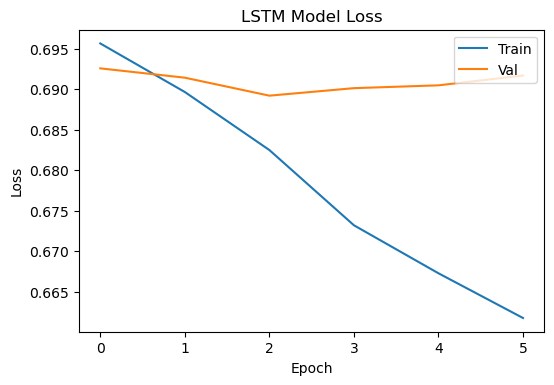

In [31]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [34]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(64, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dropout(0.3))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

Epoch 1/100
1398/1398 [==============================] - 13s 9ms/step - loss: 0.6977 - binary_accuracy: 0.5189 - precision_12: 0.5079 - recall_12: 0.4760 - auc_7: 0.5212 - val_loss: 0.6910 - val_binary_accuracy: 0.5285 - val_precision_12: 0.5927 - val_recall_12: 0.4049 - val_auc_7: 0.5534_12: 0.5461 - ETA: 6s - ETA: 3s - loss: 0.6970 - binary_accurac - ETA: 1s - loss: 0.6968 - binary_accuracy: 0.5241 - precis
Epoch 2/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6846 - binary_accuracy: 0.5559 - precision_12: 0.5489 - recall_12: 0.5091 - auc_7: 0.5739 - val_loss: 0.6880 - val_binary_accuracy: 0.5322 - val_precision_12: 0.5752 - val_recall_12: 0.5104 - val_auc_7: 0.55846787 - binary_accuracy: 0.5973 - precision_12: 0.5896 - recall_12: 0.8726 - auc_7: 0. - ETA: 8s - loss: 0.6811 - binary_accuracy: 0.5785 - precision_12:  - ETA: 1s - loss: 0.6841 - binary_accuracy: 0.5560 
Epoch 3/100
1398/1398 [==============================] - 12s 9ms/step - loss: 0.6764 - binar

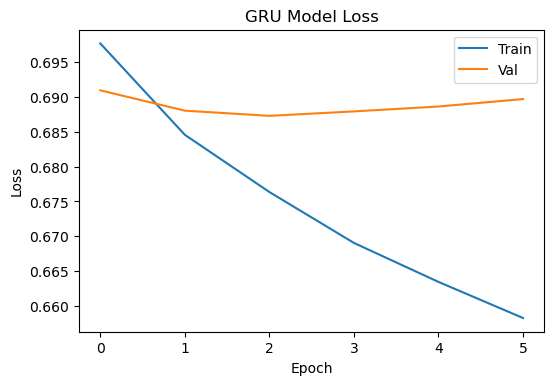

In [35]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

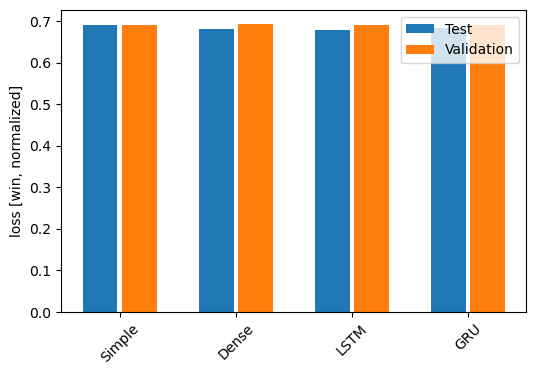

In [43]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

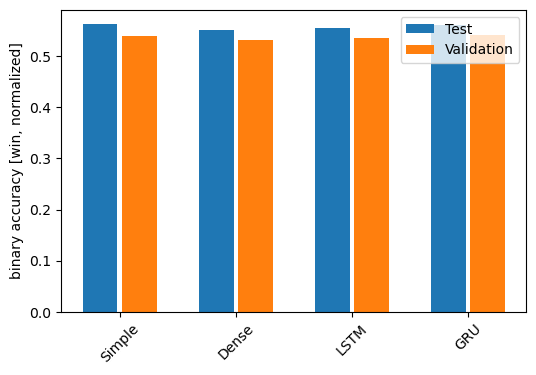

In [42]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'binary_accuracy'
metric_index = lstm_model.metrics_names.index('binary_accuracy')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('binary accuracy [win, normalized]')
plt.bar(x - 0.17, test_loss, width, label='Test')
plt.bar(x + 0.17, val_loss, width, label='Validation')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()